In [20]:
import pywt
w = pywt.Wavelet('db3')
print(len(w.filter_bank))
(phi, psi, x) = w.wavefun(level=5)
x

4


array([0.     , 0.03125, 0.0625 , 0.09375, 0.125  , 0.15625, 0.1875 ,
       0.21875, 0.25   , 0.28125, 0.3125 , 0.34375, 0.375  , 0.40625,
       0.4375 , 0.46875, 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  ,
       0.65625, 0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375,
       0.875  , 0.90625, 0.9375 , 0.96875, 1.     , 1.03125, 1.0625 ,
       1.09375, 1.125  , 1.15625, 1.1875 , 1.21875, 1.25   , 1.28125,
       1.3125 , 1.34375, 1.375  , 1.40625, 1.4375 , 1.46875, 1.5    ,
       1.53125, 1.5625 , 1.59375, 1.625  , 1.65625, 1.6875 , 1.71875,
       1.75   , 1.78125, 1.8125 , 1.84375, 1.875  , 1.90625, 1.9375 ,
       1.96875, 2.     , 2.03125, 2.0625 , 2.09375, 2.125  , 2.15625,
       2.1875 , 2.21875, 2.25   , 2.28125, 2.3125 , 2.34375, 2.375  ,
       2.40625, 2.4375 , 2.46875, 2.5    , 2.53125, 2.5625 , 2.59375,
       2.625  , 2.65625, 2.6875 , 2.71875, 2.75   , 2.78125, 2.8125 ,
       2.84375, 2.875  , 2.90625, 2.9375 , 2.96875, 3.     , 3.03125,
       3.0625 , 3.09

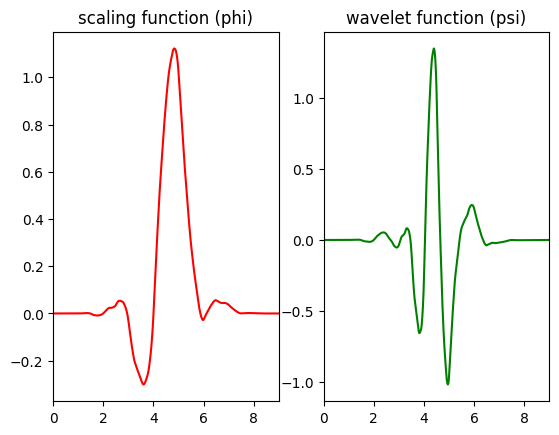

In [23]:
import sys

import matplotlib.pyplot as plt
import numpy as np

import pywt

usage = """
Usage:
    python waveinfo.py waveletname

    Example: python waveinfo.py 'sym5'
"""


wavelet = pywt.Wavelet('sym5')
level = 20


data = wavelet.wavefun(level)
if len(data) == 2:
    x = data[1]
    psi = data[0]
    fig = plt.figure()
    if wavelet.complex_cwt:
        plt.subplot(211)
        plt.title(wavelet.name+' real part')
        mi, ma = np.real(psi).min(), np.real(psi).max()
        margin = (ma - mi) * 0.05
        plt.plot(x,np.real(psi))
        plt.ylim(mi - margin, ma + margin)
        plt.xlim(x[0], x[-1])
        plt.subplot(212)
        plt.title(wavelet.name+' imag part')
        mi, ma = np.imag(psi).min(), np.imag(psi).max()
        margin = (ma - mi) * 0.05
        plt.plot(x,np.imag(psi))
        plt.ylim(mi - margin, ma + margin)
        plt.xlim(x[0], x[-1])
    else:
        mi, ma = psi.min(), psi.max()
        margin = (ma - mi) * 0.05
        plt.plot(x,psi)
        plt.title(wavelet.name)
        plt.ylim(mi - margin, ma + margin)
        plt.xlim(x[0], x[-1])
else:
    funcs, x = data[:-1], data[-1]
    labels = ["scaling function (phi)", "wavelet function (psi)",
              "r. scaling function (phi)", "r. wavelet function (psi)"]
    colors = ("r", "g", "r", "g")
    fig = plt.figure()
    for i, (d, label, color) in enumerate(zip(funcs, labels, colors)):
        mi, ma = d.min(), d.max()
        margin = (ma - mi) * 0.05
        ax = fig.add_subplot((len(data) - 1) // 2, 2, 1 + i)

        ax.plot(x, d, color)
        ax.set_title(label)
        ax.set_ylim(mi - margin, ma + margin)
        ax.set_xlim(x[0], x[-1])

plt.show()

In [53]:
def TRUE(x):
    return lambda y: x

def FALSE(x):
    return lambda y: y

def NOT(x):
    return x(FALSE)(TRUE)

AND = lambda x: lambda y: x(y)(x)

def incr(x):
    return x + 1

CONS = lambda a: lambda b: lambda s: s(a)(b)
CAR = lambda p: p(TRUE)
CDR = lambda p: p(FALSE)

p = CONS(2)(CONS(3)(4))
CAR(CDR(p))

ZERO = lambda f: lambda x: x
ONE = lambda f: lambda x: f(x)
TWO = lambda f: lambda x: f(f(x))
THREE = lambda f: lambda x: f(f(f(x)))
SUCC = lambda n: lambda f: lambda x: f(n(f)(x))

T = lambda p: CONS(SUCC(CAR(p)))(CAR(p))
PRED = lambda n: CDR(n(T)(CONS(ZERO)(ZERO)))

ADD = lambda a: lambda b: b(SUCC)(a)
SUB = lambda a: lambda b: b(PRED)(a)
MULT = lambda a: lambda b: lambda f: a(b(f))

LAZY_TRUE = lambda x: lambda y: x()
LAZY_FALSE = lambda x: lambda y: y()
ISZERO = lambda n: n(lambda f: LAZY_FALSE)(LAZY_TRUE)

FACT = lambda n: ISZERO(n)(lambda: ONE)(lambda: MULT(n)(FACT(PRED(n))))

FACT(SUCC(SUCC(THREE)))(incr)(0)

120